Segunda Simulación
-----------------------------
En esta tanda de simulaciones vamos a comenzar a trabajar con datos reales y tratar de procesarlos. La idea es chocarnos con los problemas que van a surgir de trabajar con datos reales y luego investigar formas de solucionar esos problemas.

dict_keys(['__header__', '__version__', '__globals__', 'Fs', 'ecg_lead2', 'ecg_lead3', 'measurement_info', 'pcg_audio', 'radar_I', 'radar_Q', 'respiration'])


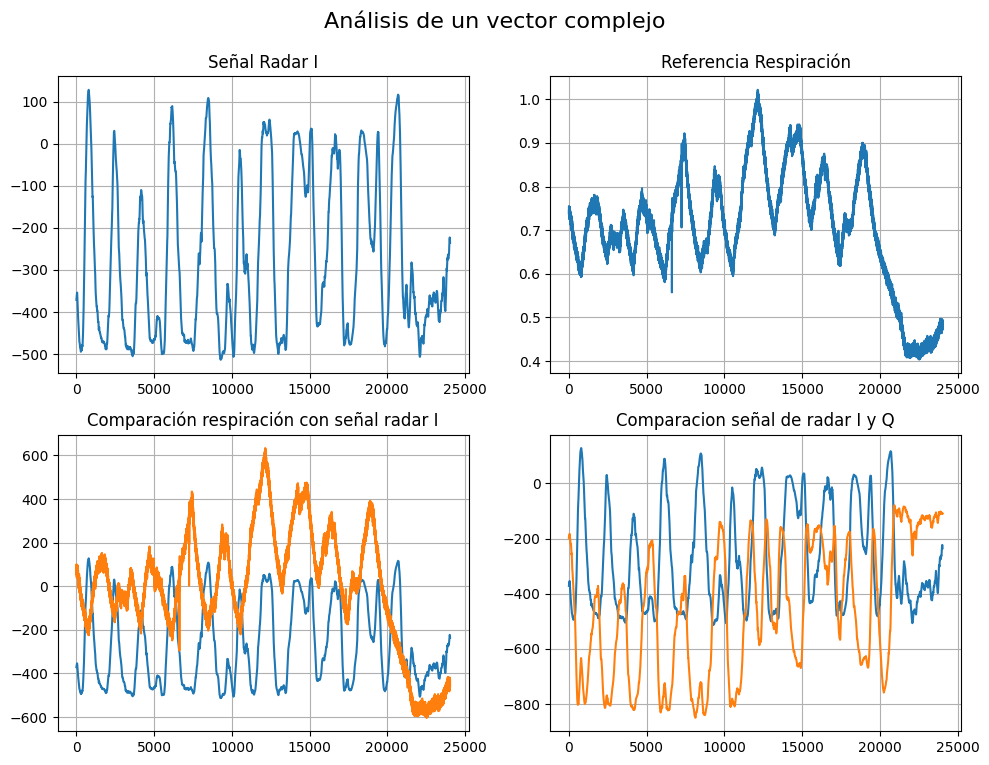

In [49]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy

def periodograma(x, fs=1.0, plot=True):
    """
    Calcula el periodograma de una señal.

    Parámetros:
    - x: np.array
        Señal de entrada (1D).
    - fs: float
        Frecuencia de muestreo (Hz).
    - plot: bool
        Si True, grafica el periodograma.

    Retorna:
    - f: np.array
        Frecuencias.
    - Pxx: np.array
        Densidad espectral de potencia estimada.
    """
    N = len(x)
    x = x - np.mean(x)  # Eliminar componente de DC

    # Calcular FFT
    Xf = np.fft.fft(x)
    Xf = Xf[:N//2]  # Solo parte positiva del espectro

    # Frecuencias correspondientes
    f = np.fft.fftfreq(N, d=1/fs)[:N//2]

    # Densidad espectral de potencia (escala unilateral)
    Pxx = (1 / (fs * N)) * np.abs(Xf)**2
    Pxx[1:-1] = 2 * Pxx[1:-1]  # Duplicar las frecuencias intermedias

    if plot:
        plt.figure(figsize=(8, 4))
        plt.plot(f, Pxx, label='Periodograma ')
        plt.xlabel('Frecuencia (Hz)')
        plt.ylabel('Densidad espectral de potencia')
        plt.title('Periodograma de la señal')
        plt.grid(True)
        plt.legend()
        plt.tight_layout()
        plt.show()

    return f, Pxx

Path_Al_Archivo = "Coleccion De Datos/datasets_scidata_vsmdb/datasets/measurement_data_person1/PCG_front_radar_front/radar_2L_PCG_4L/DATASET_2016-12-20_11-30-47_Person 1.mat"

Datos = scipy.io.loadmat(Path_Al_Archivo)
Nombres = Datos.keys()
print(Nombres)

# Crear figura y subplots
fig, axs = plt.subplots(2, 2, figsize=(10, 8))
fig.suptitle('Análisis de un vector complejo', fontsize=16)

# Señal Radar I
axs[0, 0].plot(Datos['radar_I'])
axs[0, 0].set_title('Señal Radar I')
axs[0, 0].grid(True)

# Referencia Respiración
axs[0, 1].plot(Datos['respiration'])
axs[0, 1].set_title('Referencia Respiración')
axs[0, 1].grid(True)

# Comparación respiración con señal radar I
axs[1, 0].plot(Datos['radar_I'])
axs[1, 0].plot(Datos['respiration']*2000-np.mean(Datos['respiration']*2000))
axs[1, 0].set_title('Comparación respiración con señal radar I')
axs[1, 0].grid(True)

# Comparacion señal de radar I y Q
axs[1, 1].plot(Datos['radar_I'])
axs[1, 1].plot(Datos['radar_Q'])
axs[1, 1].set_title('Comparacion señal de radar I y Q')
axs[1, 1].grid(True)

# Ajustar espacio
plt.tight_layout(rect=[0, 0.03, 1, 0.99])
plt.show()


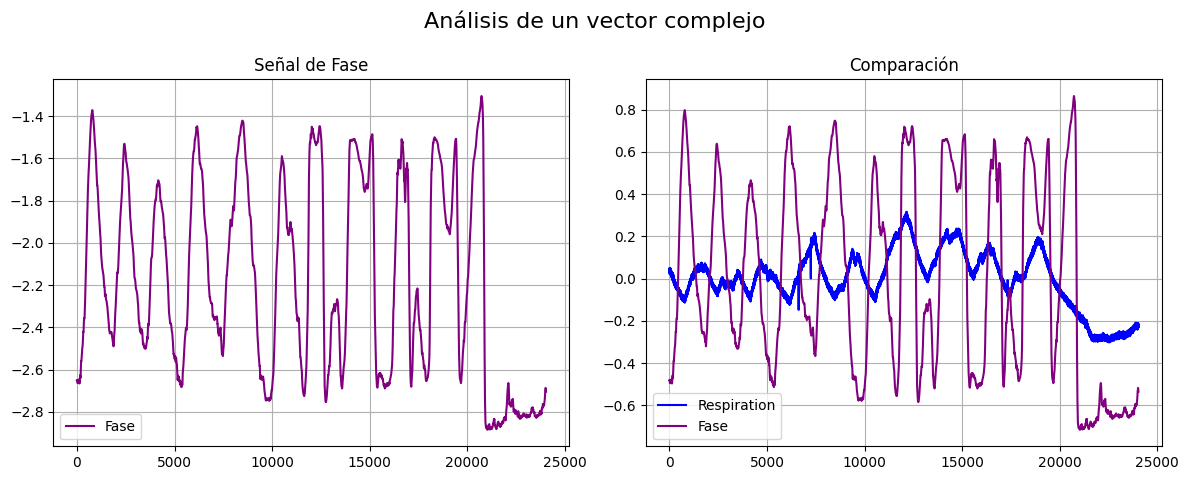

In [50]:
Datos_Complejos = Datos['radar_I'] + 1j* Datos['radar_Q'] 

fase = np.angle(Datos_Complejos)


# Crear figura con 1 fila y 2 columnas
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas
fig.suptitle('Análisis de un vector complejo', fontsize=16)

# Gráfico de la izquierda: Fase
axs[0].plot(fase, label='Fase', color='purple')
axs[0].set_title('Señal de Fase')
axs[0].grid(True)
axs[0].legend()

# Gráfico de la derecha: Comparación
axs[1].plot(Datos['respiration']-np.mean(Datos['respiration']), label='Respiration', color='blue')
axs[1].plot(fase-np.mean(fase), label='Fase', color='purple')
axs[1].set_title('Comparación')
axs[1].grid(True)
axs[1].legend()

# Ajustar espacio
plt.tight_layout(rect=[0, 0.03, 1, 0.99])  # Deja espacio para el título
plt.show()



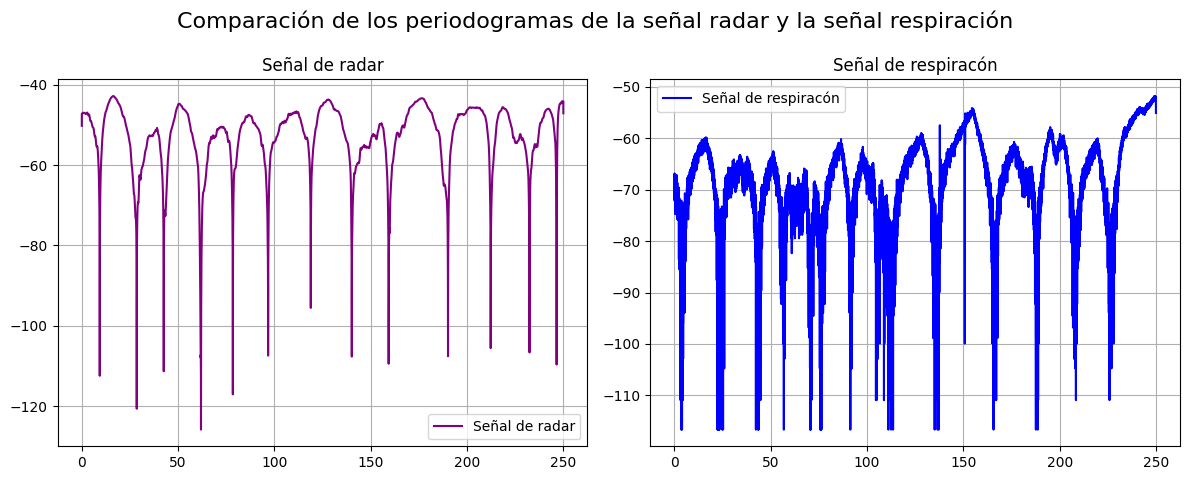

In [62]:
## Genero el periodograma de la señal de radar
f_1, Pxx_1 = periodograma(fase, Datos['Fs'][0], plot=False)

## Genero el periodograma de la señal de respiración
f_2, Pxx_2 = periodograma(Datos['respiration'], Datos['Fs'][0], plot=False)

# Crear figura con 1 fila y 2 columnas
fig, axs = plt.subplots(1, 2, figsize=(12, 5))  # 1 fila, 2 columnas
fig.suptitle('Comparación de los periodogramas de la señal radar y la señal respiración', fontsize=16)

# Gráfico de la izquierda: Señal de radar
axs[0].plot(f_1, 10 * np.log10(Pxx_1), label='Señal de radar', color='purple')
axs[0].set_title('Señal de radar')
axs[0].grid(True)
axs[0].legend()

# Gráfico de la derecha: Señal de respiracón
axs[1].plot(f_2, 10 * np.log10(Pxx_2), label='Señal de respiracón', color='blue')
axs[1].set_title('Señal de respiracón')
axs[1].grid(True)
axs[1].legend()

# Ajustar espacio
plt.tight_layout(rect=[0, 0.03, 1, 0.99])  # Deja espacio para el título
plt.show()

